# botswana bank customer churn prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 로드

In [4]:
# bank_df = pd.read_csv('./data/botswana_bank_customer_churn_noisy.csv')
bank_df = pd.read_csv('./data/bank_churn.csv')
bank_df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [5]:
bank_df.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [ ]:
# bank_df['Date of Birth'].apply(type)


0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
115635    <class 'str'>
115636    <class 'str'>
115637    <class 'str'>
115638    <class 'str'>
115639    <class 'str'>
Name: Date of Birth, Length: 115640, dtype: object

- 확실하게 불필요한 컬럼 삭제

In [ ]:
# new_bank_df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname', 'First Name', 'Contact Information', 'Address', 'Preferred Communication Channel', 'Churn Reason', 'Churn Date'], axis=1)
new_bank_df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
new_bank_df

,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,1987-08-29,Male,Divorced,3,Radiation protection practitioner,70189.486588,High School,30,Retail,369.509670,24,41959.740000,0,191789.459430,1,0
1,2000-02-07,Male,Married,1,Charity fundraiser,58209.870000,High School,27,SME,665.000000,10,8916.670000,0,30624.760000,4,1
2,1954-02-03,Female,Single,1,"Clinical scientist, histocompatibility and imm...",9794.010000,High School,14,Retail,715.000000,21,43270.540000,0,111956.610000,2,6
3,1991-01-15,Male,Divorced,5,"Psychologist, counselling",15088.980000,High School,23,Corporate,804.868827,17,18057.833978,0,201187.610000,1,0
4,1992-04-08,Female,Married,2,"Teacher, early years/pre",60726.560000,Diploma,22,Corporate,549.000000,25,32686.840000,0,60391.240000,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,1965-03-09,Male,Divorced,2,Chemical engineer,15704.150000,Diploma,10,Corporate,350.000000,23,26370.300000,1,20804.190000,2,7
115636,1955-01-10,Female,Married,3,Chartered legal executive (England and Wales),75792.620000,Diploma,8,Corporate,721.000000,15,30690.633517,0,10041.210000,4,7
115637,1955-08-29,Male,Single,4,Field trials officer,30142.280000,Diploma,28,Retail,769.265833,19,6440.850000,0,108833.430000,1,4
115638,1992-12-27,Female,Married,0,Legal secretary,58636.060000,High School,22,Retail,584.000000,23,5740.080000,0,201954.193274,5,6


In [7]:
from datetime import datetime

new_bank_df['Date of Birth'] = pd.to_datetime(new_bank_df['Date of Birth'])

today = pd.to_datetime('today')

new_bank_df['Age'] = (today - new_bank_df['Date of Birth']).dt.days // 365

new_bank_df

,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Age
0,1987-08-29,Male,Divorced,3,Radiation protection practitioner,70189.486588,High School,30,Retail,369.509670,24,41959.740000,0,191789.459430,1,0,37
1,2000-02-07,Male,Married,1,Charity fundraiser,58209.870000,High School,27,SME,665.000000,10,8916.670000,0,30624.760000,4,1,25
2,1954-02-03,Female,Single,1,"Clinical scientist, histocompatibility and imm...",9794.010000,High School,14,Retail,715.000000,21,43270.540000,0,111956.610000,2,6,71
3,1991-01-15,Male,Divorced,5,"Psychologist, counselling",15088.980000,High School,23,Corporate,804.868827,17,18057.833978,0,201187.610000,1,0,34
4,1992-04-08,Female,Married,2,"Teacher, early years/pre",60726.560000,Diploma,22,Corporate,549.000000,25,32686.840000,0,60391.240000,5,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,1965-03-09,Male,Divorced,2,Chemical engineer,15704.150000,Diploma,10,Corporate,350.000000,23,26370.300000,1,20804.190000,2,7,60
115636,1955-01-10,Female,Married,3,Chartered legal executive (England and Wales),75792.620000,Diploma,8,Corporate,721.000000,15,30690.633517,0,10041.210000,4,7,70
115637,1955-08-29,Male,Single,4,Field trials officer,30142.280000,Diploma,28,Retail,769.265833,19,6440.850000,0,108833.430000,1,4,69
115638,1992-12-27,Female,Married,0,Legal secretary,58636.060000,High School,22,Retail,584.000000,23,5740.080000,0,201954.193274,5,6,32


In [8]:
cols = ['Age'] + [col for col in new_bank_df.columns if col != 'Age']
new_bank_df = new_bank_df[cols]
new_bank_df

,Age,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,37,1987-08-29,Male,Divorced,3,Radiation protection practitioner,70189.486588,High School,30,Retail,369.509670,24,41959.740000,0,191789.459430,1,0
1,25,2000-02-07,Male,Married,1,Charity fundraiser,58209.870000,High School,27,SME,665.000000,10,8916.670000,0,30624.760000,4,1
2,71,1954-02-03,Female,Single,1,"Clinical scientist, histocompatibility and imm...",9794.010000,High School,14,Retail,715.000000,21,43270.540000,0,111956.610000,2,6
3,34,1991-01-15,Male,Divorced,5,"Psychologist, counselling",15088.980000,High School,23,Corporate,804.868827,17,18057.833978,0,201187.610000,1,0
4,32,1992-04-08,Female,Married,2,"Teacher, early years/pre",60726.560000,Diploma,22,Corporate,549.000000,25,32686.840000,0,60391.240000,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,60,1965-03-09,Male,Divorced,2,Chemical engineer,15704.150000,Diploma,10,Corporate,350.000000,23,26370.300000,1,20804.190000,2,7
115636,70,1955-01-10,Female,Married,3,Chartered legal executive (England and Wales),75792.620000,Diploma,8,Corporate,721.000000,15,30690.633517,0,10041.210000,4,7
115637,69,1955-08-29,Male,Single,4,Field trials officer,30142.280000,Diploma,28,Retail,769.265833,19,6440.850000,0,108833.430000,1,4
115638,32,1992-12-27,Female,Married,0,Legal secretary,58636.060000,High School,22,Retail,584.000000,23,5740.080000,0,201954.193274,5,6


In [9]:
new_bank_df = new_bank_df.drop('Date of Birth', axis=1)
new_bank_df

,Age,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,37,Male,Divorced,3,Radiation protection practitioner,70189.486588,High School,30,Retail,369.509670,24,41959.740000,0,191789.459430,1,0
1,25,Male,Married,1,Charity fundraiser,58209.870000,High School,27,SME,665.000000,10,8916.670000,0,30624.760000,4,1
2,71,Female,Single,1,"Clinical scientist, histocompatibility and imm...",9794.010000,High School,14,Retail,715.000000,21,43270.540000,0,111956.610000,2,6
3,34,Male,Divorced,5,"Psychologist, counselling",15088.980000,High School,23,Corporate,804.868827,17,18057.833978,0,201187.610000,1,0
4,32,Female,Married,2,"Teacher, early years/pre",60726.560000,Diploma,22,Corporate,549.000000,25,32686.840000,0,60391.240000,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,60,Male,Divorced,2,Chemical engineer,15704.150000,Diploma,10,Corporate,350.000000,23,26370.300000,1,20804.190000,2,7
115636,70,Female,Married,3,Chartered legal executive (England and Wales),75792.620000,Diploma,8,Corporate,721.000000,15,30690.633517,0,10041.210000,4,7
115637,69,Male,Single,4,Field trials officer,30142.280000,Diploma,28,Retail,769.265833,19,6440.850000,0,108833.430000,1,4
115638,32,Female,Married,0,Legal secretary,58636.060000,High School,22,Retail,584.000000,23,5740.080000,0,201954.193274,5,6


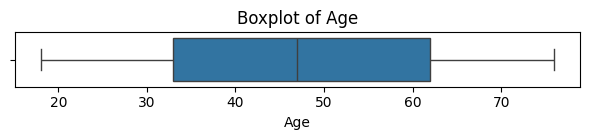

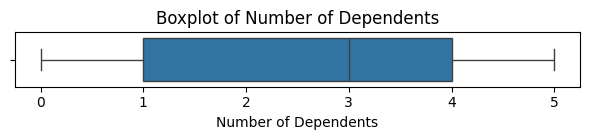

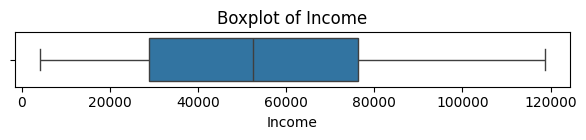

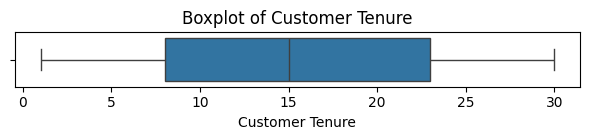

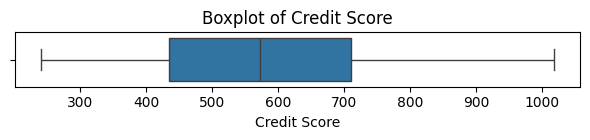

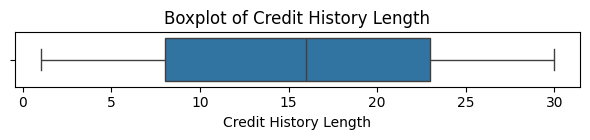

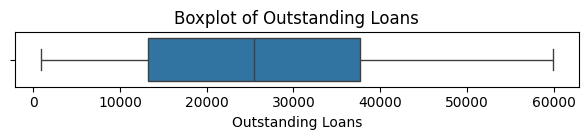

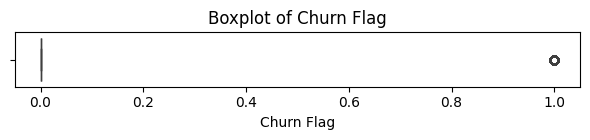

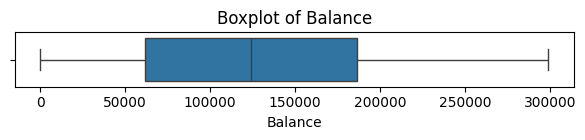

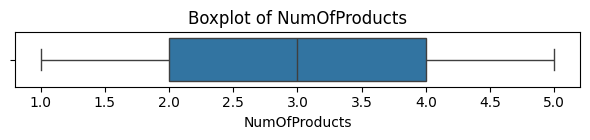

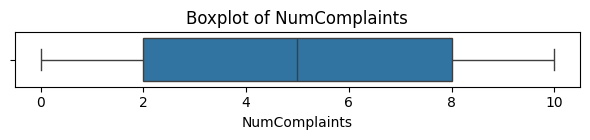

In [34]:
numerical_cols = new_bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=new_bank_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

new_bank_df_label = new_bank_df.copy()

cols_to_encode = ['Gender', 'Education Level', 'Marital Status', 'Occupation', 'Customer Segment']

label_encoders = {}
for col in cols_to_encode:
    L_encoder = LabelEncoder()
    new_bank_df_label[col] = L_encoder.fit_transform(new_bank_df_label[col])
    label_encoders[col] = L_encoder

print(new_bank_df_label.head())
# gender -> female : 0, male : 1
# marital status -> divorced : 0, married : 1, single : 2
# education level -> Bachelor's : 0, Diploma : 1, high school : 2, master's : 3, 
# Customer Segment -> 'Corporate' : 0, 'Retail' : 1, 'SME' : 2
# Churn Flag -> Stay : 0, Churn : 1

   Age  Gender  Marital Status  Number of Dependents  Occupation  \
0   37       1               0                     3         494   
1   25       1               1                     1          84   
2   71       0               2                     1         115   
3   34       1               0                     5         473   
4   32       0               1                     2         585   

         Income  Education Level  Customer Tenure  Customer Segment  \
0  70189.486588                2               30                 1   
1  58209.870000                2               27                 2   
2   9794.010000                2               14                 1   
3  15088.980000                2               23                 0   
4  60726.560000                1               22                 0   

   Credit Score  Credit History Length  Outstanding Loans  Churn Flag  \
0    369.509670                     24       41959.740000           0   
1    665.000000   

In [15]:
new_bank_df_label.isnull().sum()

Age                      0
Gender                   0
Marital Status           0
Number of Dependents     0
Occupation               0
Income                   0
Education Level          0
Customer Tenure          0
Customer Segment         0
Credit Score             0
Credit History Length    0
Outstanding Loans        0
Churn Flag               0
Balance                  0
NumOfProducts            0
NumComplaints            0
dtype: int64

Age                     -0.002571
Gender                  -0.002926
Marital Status          -0.004592
Number of Dependents     0.003109
Occupation               0.006067
Income                   0.001721
Education Level         -0.001438
Customer Tenure          0.000344
Customer Segment         0.002480
Credit Score            -0.179128
Credit History Length    0.002899
Outstanding Loans       -0.001214
Churn Flag               1.000000
Balance                 -0.497636
NumOfProducts           -0.179083
NumComplaints            0.204626
Name: Churn Flag, dtype: float64


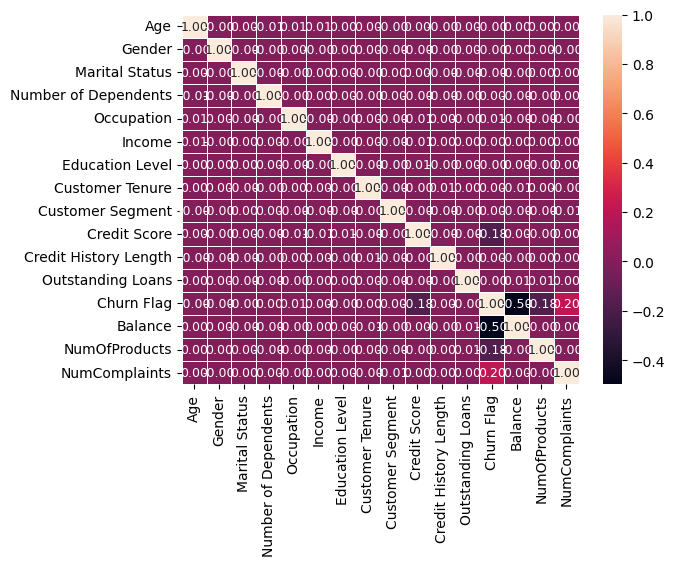

<Figure size 1400x800 with 0 Axes>

In [30]:
corr = new_bank_df_label.corr(numeric_only=True)
print(corr['Churn Flag'])
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rocket", annot_kws={"size" : 9}, linewidths=0.5)
plt.figure(figsize=(14,8))
plt.tight_layout()
plt.show()

In [11]:
# label_encoders['Gender'].classes_
# label_encoders['Education Level'].classes_
# label_encoders['Marital Status'].classes_
label_encoders['Customer Segment'].classes_

array(['Corporate', 'Retail', 'SME'], dtype=object)

In [31]:
X = new_bank_df_label.drop('Churn Flag', axis=1)
y = new_bank_df_label['Churn Flag']

In [33]:
columns_to_scale = [
    'Age', 'Income', 'Outstanding Loans', 'Credit Score',
    'Balance', 'Customer Tenure', 'Credit History Length',
    'NumOfProducts', 'NumComplaints'
]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
# StandardScaler 적용(Income, Outstanding Loans, Balance)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

🔍 Accuracy (CV): 0.9933 ± 0.0003
🔍 Precision (CV): 0.9752 ± 0.0019
🔍 Recall (CV): 0.9698 ± 0.0018
🔍 F1 (CV): 0.9725 ± 0.0013


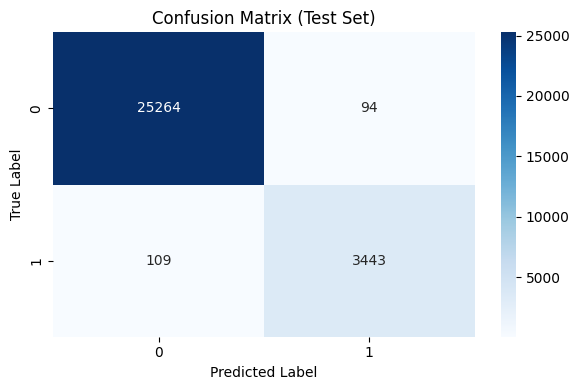

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 각 지표에 대해 교차검증 (5-fold)
for score_name in scoring:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring[score_name])
    print(f"🔍 {score_name.capitalize()} (CV): {scores.mean():.4f} ± {scores.std():.4f}")

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()